In [29]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

person = '6_20130712'
band = 'de'

tsne = []
for label in range(3):
    t0_degree, t1_degree, t2_degree = [], [], []
    
    for cnt in range(225):
        try:
            adj_matrix = np.load(f'/data/Anaiis/garage/adj_matrix/{person}-{band}-adj_matrix{cnt}-{label}.npy')
        except:
            continue
        degree = adj_matrix.mean(axis = 1)
        tsne.append(degree)
        t0_degree.append(degree[:62])
        t1_degree.append(degree[62: 128])
        t2_degree.append(degree[128:186])

    data_t0 = np.array(t0_degree)
    data_t1 = np.array(t1_degree)
    data_t2 = np.array(t2_degree)

    n_clusters = 5

    # 创建 KMeans 对象并进行拟合
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_t0)
    cluster_centers_t0 = kmeans.cluster_centers_
    kmeans.fit(data_t1)
    cluster_centers_t1 = kmeans.cluster_centers_
    kmeans.fit(data_t2)
    cluster_centers_t2 = kmeans.cluster_centers_
    print(f"label = {label}")
    print(cluster_centers_t0.argmax(axis=1))
    print(cluster_centers_t1.argmax(axis=1))
    print(cluster_centers_t2.argmax(axis=1))



/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


label = 0
[36 36 36 36 36]
[36 36 36 36 36]
[32 32 32 32 32]


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

label = 1
[36 36 36 36  4]
[36 36 36 36  4]
[32 32 32 32  0]
label = 2
[36 36 36  4 36]
[36 36 36  4 36]
[32 32 32  0 32]


/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/micro/anaconda3/envs/bob_env1/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


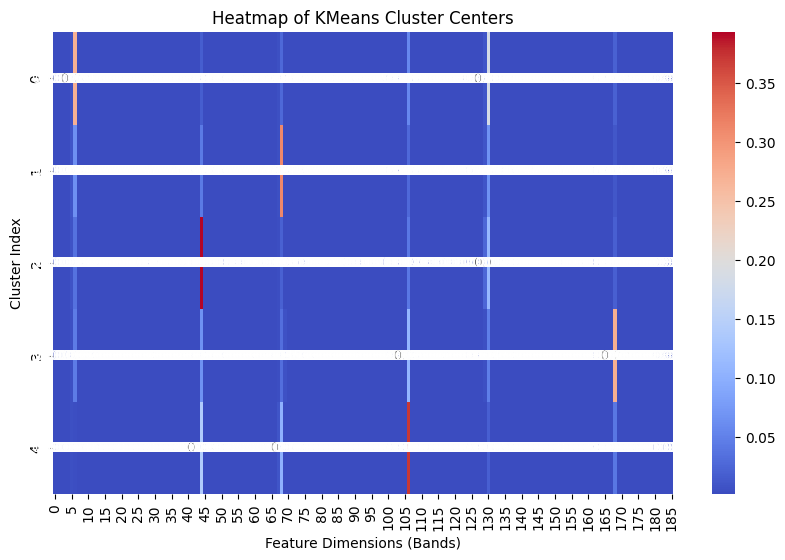

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 使用 seaborn 画热图
sns.heatmap(cluster_centers, annot=True, cmap="coolwarm", cbar=True)

# 添加标题和标签
plt.title('Heatmap of KMeans Cluster Centers')
plt.xlabel('Feature Dimensions (Bands)')
plt.ylabel('Cluster Index')

# 显示图像
plt.show()

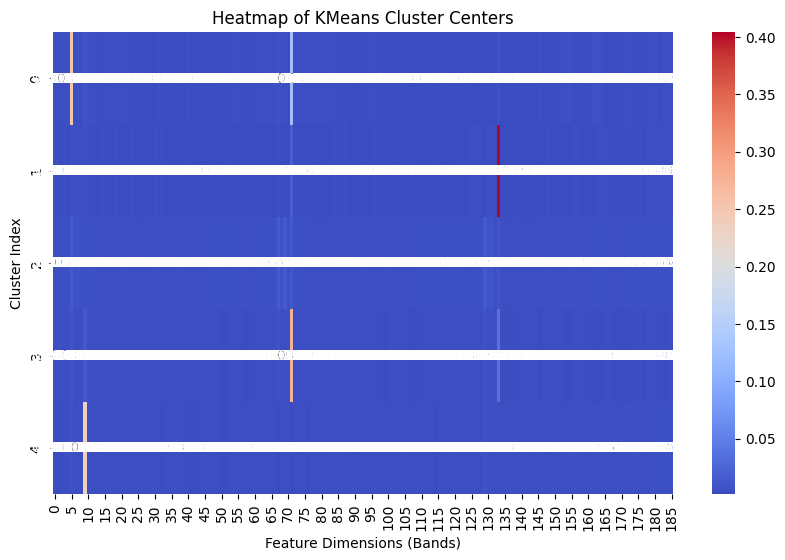

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 使用 seaborn 画热图
sns.heatmap(cluster_centers, annot=True, cmap="coolwarm", cbar=True)

# 添加标题和标签
plt.title('Heatmap of KMeans Cluster Centers')
plt.xlabel('Feature Dimensions (Bands)')
plt.ylabel('Cluster Index')

# 显示图像
plt.show()

# tSNE


(225, 186)


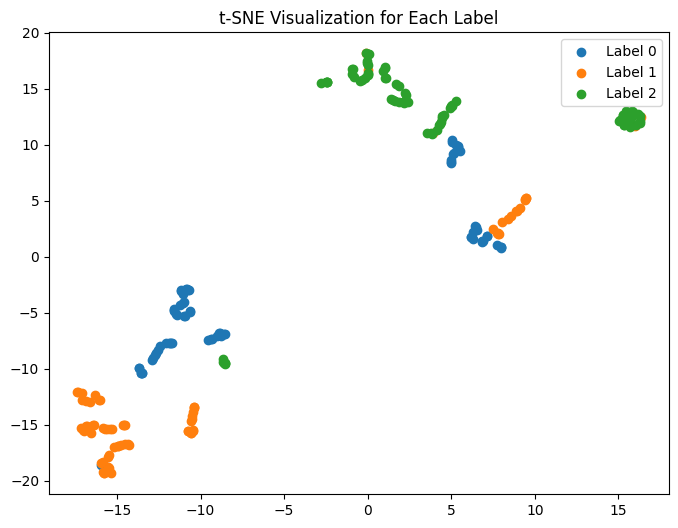

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


num_labels = 3 
labels = np.array([0] * 75 + [1] * 75 + [2] * 75)
tsne_array = np.array(tsne)
print(tsne_array.shape)
# tsne_1 = np.array(tsne_1)
# tsne_2 = np.array(tsne_2)
# data = np.concatenate((tsne_0, tsne_1, tsne_2), axis=0)
# 将(nodes, nodes)数据展平为nodes*nodes以便进行t-SNE降维

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(tsne_array)

# 可视化t-SNE结果
plt.figure(figsize=(8, 6))
for label in range(num_labels):
    plt.scatter(data_tsne[labels == label, 0], data_tsne[labels == label, 1], label=f'Label {label}')
    
plt.title('t-SNE Visualization for Each Label')
plt.legend()
plt.show()


(1011, 512)


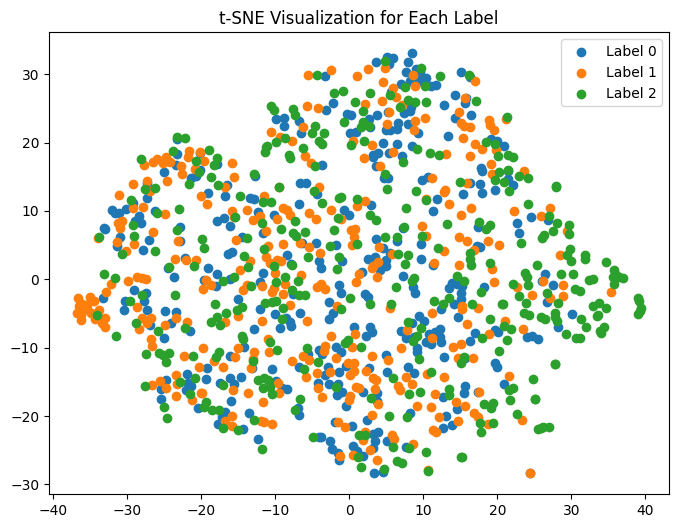

In [34]:
import torch

tsne_array = []
for i in range(1011):
    beta_feats = torch.load(f'/data/Anaiis/garage/vis_data/6_20130712/beta_feats_{i}.pt')
    beta_feats = beta_feats.cpu().numpy().mean(axis=0)
    tsne_array.append(beta_feats)
    # print("beta feats", beta_feats.shape)


num_labels = 3  # 三类标签

# 假设每个类别有num_samples // 3个样本，数据形状为(samples, nodes, nodes)
 
labels = np.load('/data/Anaiis/garage/vis_data/6_20130712/labels0924.npy')
tsne_array = np.array(tsne_array)
tsne_array = tsne_array.reshape((1011, -1))
print(tsne_array.shape)
# tsne_1 = np.array(tsne_1)
# tsne_2 = np.array(tsne_2)
# data = np.concatenate((tsne_0, tsne_1, tsne_2), axis=0)
# 将(nodes, nodes)数据展平为nodes*nodes以便进行t-SNE降维

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(tsne_array)

# 可视化t-SNE结果
plt.figure(figsize=(8, 6))
for label in range(num_labels):
    plt.scatter(data_tsne[labels == label, 0], data_tsne[labels == label, 1], label=f'Label {label}')
    
plt.title('t-SNE Visualization for Each Label')
plt.legend()
plt.show()

In [33]:
labels

array([1, 2, 0, ..., 1, 1, 0])